In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
us = pd.read_csv("us_stock.csv", index_col="Date", parse_dates=True)
vn = pd.read_csv("vn_price.csv", index_col="TradingDate", parse_dates=True)

In [12]:
us_diff = us.diff()
vn_diff = vn.diff()

us_sign = np.sign(us_diff)
vn_sign = np.sign(vn_diff)

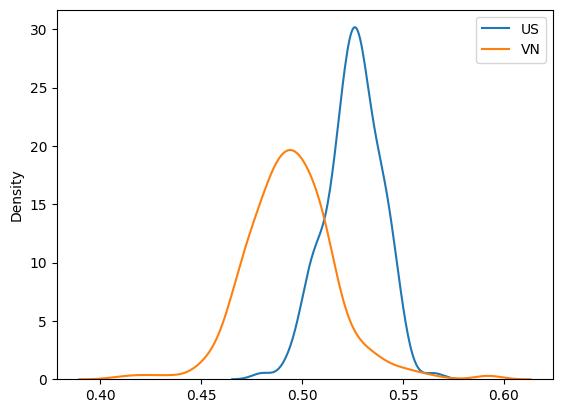

In [18]:
import numpy as np
import seaborn as sns

sns.kdeplot(us_sign[us_sign>0].sum()/abs(us_sign).sum(), label="US")
sns.kdeplot(vn_sign[vn_sign>0].sum()/abs(vn_sign).sum(), label="VN")
plt.legend()